In [50]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon import plotter
import matplotlib.pyplot as plt
import numpy as np

with MPRester("rtIvjK8boEIrBtPMF") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1011695")
    ph_struct = m.get_phonon_bandstructure_by_material_id("mp-1011695")

Cristal considéré : Cs2Se

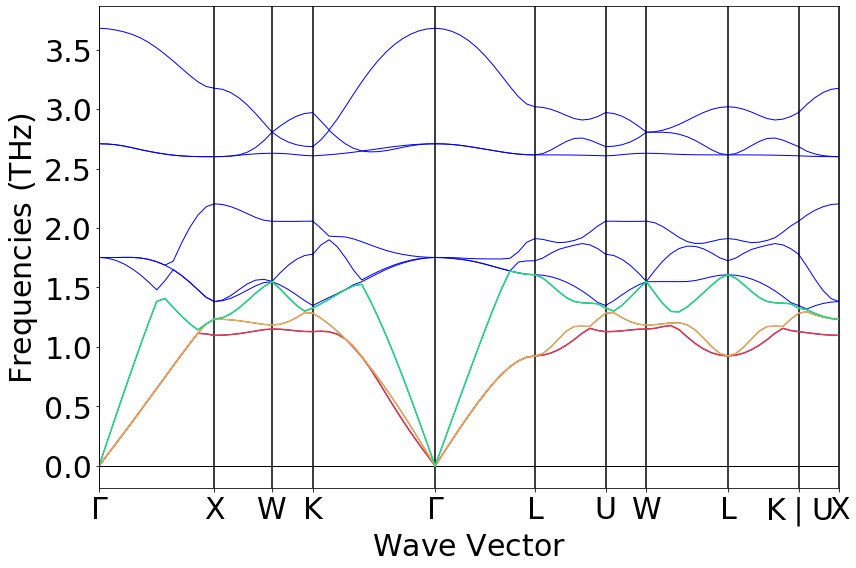

In [51]:
#Affichage de la structure de bande des phonons
ph_bandstruct_plot = plotter.PhononBSPlotter(ph_struct)

data = ph_bandstruct_plot.bs_plot_data()

absc = data.get('distances')
ordo = data.get('frequency')

ph_bandstruct_plot.get_plot()

# Affichage des trois branches acoustiques différentes pour lesquelles la vitesse du son sera calculée
for i in range(len(absc)):
    plt.plot(absc[i], ordo[i][0], color = '#E63946')
    plt.plot(absc[i], ordo[i][1], color = '#EDAE49')
    plt.plot(absc[i], ordo[i][2], color = '#1FE074')


In [56]:
# Définition de l'angström
ang = 10**(-10)

# Vitesse du son

Sous l'hypothèse d'une grande longueur d'onde, et donc d'un faible vecteur d'onde (proche de $\Gamma$), la relation de dispersion est quasiment linéaire. On peut donc noter : 
$$\omega = v_s|\mathbf{q}|$$
Pour $\omega = 2\pi f$ proche de 0, on a :
$$v_s = \frac{\partial{\omega}}{\partial{\mathbf{q}}}$$

On approxime donc numériquement la vitesse du son dans le cristal par une différence finie en considérant un premier point en $\omega = 0$ et un autre point proche de ce dernier (pour trouver la tangente en $\omega=0$). Il faut faire attention à prendre en compte le fait que les vecteurs d'ondes sont donnés en angström et donc de faire la conversion, et à ne pas oublier le facteur $2\pi$ liant la fréquence et la pulsation.

En se référant à la structure de bande des phonons, on calculera la vitesse du son selon les trois directions suivantes : $\Gamma - X$, $\Gamma - K$ et $\Gamma - L$.

## Direction $\Gamma - X$

La vitesse du son sera calculée pour la branche en jaune sur le graphe ci-dessus, d'indice 1. 

In [53]:
x0 = absc[0][0]/ang ; x1 = absc[0][1]/ang # Il faut bien diviser par ang, car q est exprimé en m^-1
y0 = 2*np.pi*ordo[0][1][0]*10**(12) ; y1 = 2*np.pi*ordo[0][1][1]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la branche considérée vaut", vs, "m/s.\n")

La vitesse du son pour la branche considérée vaut 1061.0950900654389 m/s.



## Direction $\Gamma - K$

La vitesse du son sera calculée pour la branche en rouge sur le graphe ci-dessus, d'indice 0. 

In [54]:
x0 = absc[3][-1]/ang ; x1 = absc[3][-2]/ang
y0 = 2*np.pi*ordo[3][0][-1]*10**(12) ; y1 = 2*np.pi*ordo[3][0][-2]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la branche considérée vaut", vs, "m/s.\n")

La vitesse du son pour la branche considérée vaut 1065.3216164999146 m/s.



## Direction $\Gamma - L$

La vitesse du son sera calculée pour la branche en vert sur le graphe ci-dessus, d'indice 2. 

In [55]:
x0 = absc[4][0]/ang ; x1 = absc[4][1]/ang
y0 = 2*np.pi*ordo[4][2][0]*10**(12) ; y1 = 2*np.pi*ordo[4][2][1]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la branche considérée vaut", vs, "m/s.\n")

La vitesse du son pour la branche considérée vaut 2215.6123721523477 m/s.



On distingue clairement que la pente pour la branche verte est plus grande que celle pour la branche rouge autour de $\Gamma$. Il est donc logique de retrouver une vitesse plus grande pour la branche verte que la rouge.